In [ ]:
!pip install tensorflow
!pip install tensorflow-text


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 68.4 MB/s eta 0:00:00


In [ ]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=4c45aeae3a7987cdbf9643b20df87d6038eb794a35b0c9ee0fdfbe6f1f5d44d4
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [ ]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import emoji
import contractions
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text
import gensim
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Flatten
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc
from keras.layers import SpatialDropout1D
from keras.callbacks import EarlyStopping

## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
import gensim
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop

In [ ]:
# Load the dataset
train_data = pd.read_csv('/content/sample_data/categorized_new_tweets.csv')
test_data= pd.read_csv('/content/sample_data/Unseen 5pillarsEarthUK.csv',encoding='cp1252', quotechar='"', delimiter=',')

In [ ]:

# Count the number of tweets in each category
category_counts = train_data['category_name'].value_counts()

# Create a bar plot using plotly
fig = px.bar(category_counts, x=category_counts.index, y=category_counts.values,
             labels={'x': 'Category Names', 'y': 'Number of Tweets'},
             title='Number of Tweets in Each Category',
             width=400, height=600)
# Show the plot
fig.show()

In [ ]:
# download stopwords and lemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

# get stop words
stop_words = set(stopwords.words('english'))
# create lemmatizer
lemmatizer = WordNetLemmatizer()


# define regular expression patterns for removing URLs, HTML tags, and emojis
url_pattern = re.compile(r'http\S+|www\S+')
html_pattern = re.compile('<.*?>')
#emoji_pattern = re.compile('[\U0001f600-\U0001f650]')
emoji_pattern = re.compile(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]+')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "they would have"
}

In [ ]:
# function to clean text and lemmatize text
def clean_tokenize_lemmatize(text):
     # remove URLs
    text = re.sub(url_pattern, '', text)
    
    # remove HTML tags
    text = re.sub(html_pattern, '', text)
    
     # remove emojis using regex
    text = re.sub(emoji_pattern, r'', text)
    
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # remove digits
    text = re.sub(r'\d+', '', text)
    
     # expand contractions
    text = contractions.fix(text)

    # convert text to lowercase
    text = text.lower()
    
    # remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # remove stop words, tokenize, and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return tokens
    
    return text

In [ ]:
# apply clean_text function to train data
train_data['text'] = train_data['full_text'].apply(clean_tokenize_lemmatize)

# apply clean_text function to test data
test_data['text'] = test_data['full_text'].apply(clean_tokenize_lemmatize)

In [ ]:
# Define the parameters for the tokenizer and the Word2Vec model
vocab_size = 50000
embedding_dim = 512
max_len = 100
window_size = 5
min_count = 1

In [ ]:
# Train the Word2Vec model
data= [row.split(',') for row in (train_data['text'].astype(str))]
word_model = gensim.models.word2vec.Word2Vec(data, vector_size=embedding_dim, window=window_size, min_count=min_count, workers=4)


In [ ]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_data['text'])
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 21380 unique tokens.


In [ ]:
# Convert the text data to sequences of integers
X = tokenizer.texts_to_sequences(train_data['text'])

In [ ]:
# Pad the sequences to have the same length
X = pad_sequences(X, maxlen=max_len)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (13026, 100)


In [ ]:
Y = pd.get_dummies(train_data['category_name']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (13026, 4)


In [ ]:
# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(9118, 100) (9118, 4)
(3908, 100) (3908, 4)


In [ ]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(word_model.wv.key_to_index), output_dim=embedding_dim, weights=[word_model.wv.vectors]))
model.add(SpatialDropout1D(0.5))
model.add(LSTM(units=256))
model.add(Dropout(0.5))
model.add(Dense(units=4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [ ]:
# Train the model
epochs = 10
batch_size = 64
#history = model.fit(X_train, Y_train,validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size)
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])

Epoch 1/10
129/129 [==============================] - 3s 22ms/step - loss: 0.2647 - accuracy: 0.9162 - val_loss: 0.5826 - val_accuracy: 0.8026
Epoch 2/10
129/129 [==============================] - 2s 17ms/step - loss: 0.1571 - accuracy: 0.9488 - val_loss: 0.4871 - val_accuracy: 0.8542
Epoch 3/10
129/129 [==============================] - 2s 18ms/step - loss: 0.0970 - accuracy: 0.9680 - val_loss: 0.5319 - val_accuracy: 0.8443


In [ ]:
# Evaluate the model on the test set
accr = model.evaluate(X_test, Y_test)
print('Test set\n  Loss: {:0.3f}\n  Validation Accuracy: {:0.3f}'.format(accr[0], accr[1]))

123/123 [==============================] - 1s 6ms/step - loss: 0.5568 - accuracy: 0.8229
Test set
  Loss: 0.557
  Validation Accuracy: 0.823


In [ ]:
# Generate predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

123/123 [==============================] - 1s 4ms/step


In [ ]:
# Define the category names
category_names = train_data['category_name'].unique()

# Convert the category names to a list of strings
category_names = [str(category_name) for category_name in category_names]

In [ ]:
# Print classification report
print(classification_report(y_true, y_pred_classes,target_names=category_names))


                    precision    recall  f1-score   support

general_persuasion       0.85      0.89      0.87      1497
   hard_persuasion       0.80      0.79      0.80       494
    non_persuasive       0.89      0.79      0.84      1595
   soft_persuasion       0.55      0.73      0.63       322

          accuracy                           0.82      3908
         macro avg       0.77      0.80      0.78      3908
      weighted avg       0.83      0.82      0.83      3908



In [ ]:
# Print classification report
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82      1497
           1       0.75      0.69      0.72       494
           2       0.90      0.52      0.66      1595
           3       0.23      0.56      0.32       322

    accuracy                           0.69      3908
   macro avg       0.66      0.66      0.63      3908
weighted avg       0.77      0.69      0.70      3908



Confusion Matrix:
 [[1330   40   78   49]
 [  49  392   33   20]
 [ 156   54 1258  127]
 [  35    6   45  236]]


Text(0.5, 1.0, 'Confusion Matrix')

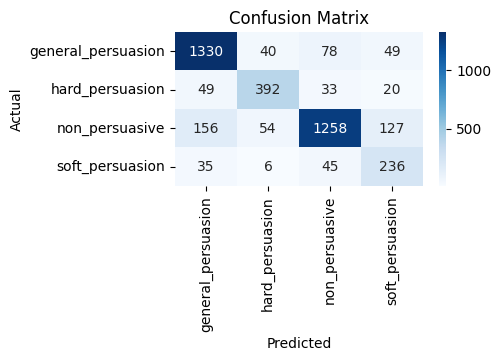

In [ ]:
import seaborn as sns
# Print confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)
# Compute and plot confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)
fig, ax = plt.subplots(figsize=(4,2))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d',
            xticklabels=train_data['category_name'].unique(),
            yticklabels=train_data['category_name'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')


In [ ]:
train_data['category_name'].unique()

In [ ]:
# Get predicted probabilities
y_pred_prob = model.predict(X_test)

# Plot AUC-ROC curve for each category
fpr = {}
tpr = {}
roc_auc = {}
n_classes = Y_test.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Plot the ROC curves
plt.figure(figsize=(8,6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of category {0} (area = {1:0.2f})'
             ''.format(train_data['category_name'][i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4)) # Set the figure size to 8x6 inches
ax.set_title('Loss')
ax.plot(history.history['loss'], label='train loss')
ax.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
ax.legend()
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

In [ ]:
tst_corpus = test_data["text"]
tst_data= [row.split(',') for row in (train_data['text'].astype(str))]

## text to sequence with the fitted tokenizer
tst_text2seq = tokenizer.texts_to_sequences(tst_data)

## padding sequence
X_test_data = kprocessing.sequence.pad_sequences(tst_text2seq, maxlen=15,
             padding="post", truncating="post")

In [ ]:
#creating submission.csv for LSTM model
seq = tokenizer.texts_to_sequences(test_data['text'])
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
labels = ['non_persuasive','hard_persuasion','general_persuasion','soft_persuasion']


# Create a DataFrame with the tweet, URL, and predicted label
results_df = pd.DataFrame({
    'Tweet': test_data['full_text'],
    'URL': test_data['url'],
    'Predicted Label': [labels[np.argmax(p)] for p in pred]
})

# Export the DataFrame to a CSV file
results_df.to_csv('LSTM_word2vec_results.csv', index=False)